# МЧА, осень 2019

## ИПР 6.  Метод конечных элементов для уравнения Пуассона.

*Примечание*. Материалы взяты из курса "Быстрые методы решения уравнений в частных производных", читавшегося группой научных вычислений в Сколковском институте науки и технологий весной 2015. Ниже приводится перевод на русский.

## МКЭ в одномерном случае:

* Рассмотрим область определения $\Omega = [0,1]$
* Сетка (результат триангуляции) ${\mathcal T}$ состоит из сегментов $[x_{i}, x_{i+1}]$ (где $x_0,...,x_N$ означают узлы)
<img src="fig/FEM_mesh_1D.png">

* Идея: материал состоит из базовых строительных блоков: треугольников, сегментов или тетраэдров.

* Возьмем кусочно линейные функции (точнее, кусочно аффинные) относительно $\mathcal T$:
$$
    u_h(x) = \sum_{i=1}^N c_i v_i(x)
$$
<img src="fig/FEM_basis_1D.png">

* Обозначим пространство функций как ${\mathcal P}^1(\mathcal T)$

* Зачастую будем использовать:
$$
\mathcal P^1_0(\mathcal T)
:=
\{u\in\mathcal P^1_0(\mathcal T) : u|_{\Omega} = 0 \}
$$

* Теперь мы можем перейти к дискретизации уравнения...

### Дискретизация уравнения (методом Галеркина):

Для начала нам надо переписать уравнение в вариационной форме.

#### Вариационная форма

* Рассмотрим уравнение Пуассона:
\\[
\begin{align*}
-\Delta u &= f
\\
u|_{\Gamma} &= 0
\end{align*}
\\]

* Умножим уравнение на функцию $v$ (называемую тестовой) такую, что $v|_{\Gamma}=0$ и проинтегрируем:
$$
-\int_{\Omega} (\Delta u) v
=- \int_{\Gamma} \nabla u v \cdot n + \int_{\Omega} \nabla u \cdot \nabla v
=\int_{\Omega} f v
\qquad\forall v
$$

* так как $v=0$ на границе, получаем
$$
\int_{\Omega} \nabla u \cdot \nabla v
=\int_{\Omega} f v
\qquad\forall v
$$
* Это уравнение называется **вариационной формой**

#### Случай граничных условий Неймана или смешанных граничных условий 

* Рассмотрим задачу
$$
\begin{align*}
-\Delta u &= f\qquad\text{для $\Omega$}
\\
u &= 0\qquad\text{для $\Gamma_1$}
\\
u_n &= 0\qquad\text{для $\Gamma_2$}
\end{align*}
$$
где $u_n$ - это производная по нормали $\Gamma_1 \cup\Gamma_2 = \partial\Omega$ (или нормальная производная).

* Необходимо ввести пространство функций $X = \{\text{функция }u : u|_{\Gamma_1}=0 \}$. Тогда для функции $v\in X$ имеем:
$$
-\int_{\Omega} \Delta u v
= - \int_{\Gamma_1} u_n v - \int_{\Gamma_2} u_n v + \int_{\Omega} \nabla u\cdot \nabla v
$$

* Магическим образом, первый интеграл =0 потому что $v=0$ на $\Gamma_1$ и второй интегра =0 потому что $u_n=0$ на $\Gamma_2$.

* **Получаем ту же вариационную задачу**, но с другим пространством функций

### Продолжим рассмотрения метода

* Обозначим $A(u,v) = \int_{\Omega} \nabla u\cdot\nabla v$ и $F(v) := \int_\Omega f v$.

* Получаем дискретные уравния:
\\[
A(u_h, v_h) = F(v_h)
\qquad \forall v_h\in \mathcal P^1_0(\mathcal T)
\\]
(И готово!)

* Чтобы имплементировать метод, нам нужно
$$
A(u_h, v_\ell) = F(v_\ell),
\qquad \ell=1,...,N-1
$$
(таким образом, в качестве тестовых функций достаточно использовать только базисные функции)

* Делаем подстановку $u_h = \sum_{k=1}^{N-1} c_k v_k$:
$$
\sum_{k=1}^{N-1} c_k A(v_k, v_\ell) = F(v_\ell) \qquad \ell=1,\ldots,N-1,
$$

* Следовательно, $A(v_k, v_\ell)$ есть элементы матрицы (называемую матрицей жесткости, **stiffness matrix**), и $F(v_\ell)$ есть компоненты вектора в правой части матричного уравнения.

* Таким образом, метод конечных элементов аналогичен методу Галеркина из ИРЛ 1.

* Остается только решить СЛАУ...

## МКЭ в 2D

* В двумерном случае сетка (или меш) состоит из треугольников
<img width="33%" src="fig/FEM_mesh_example.jpg">

    - Обычно, описывается 3 массивами:

    <tt>узлы:</tt> <br>
    $x_1$, $y_1$ <br>
    $x_2$, $y_2$ <br>
    ... <br>
    $x_N$, $y_N$ <br>
    (т.е., координаты первого узла $(x_1, y_1)$, и.т.д.)

    <tt>треугольники:</tt> <br>
    $n_1$, $n_2$, $n_3$ <br>
    $m_1$, $m_2$, $m_3$ <br>
    ... <br>
    (т.е., узлы $n_1$, $n_2$, $n_3$ являются вершинами первого треугольника, и.т.д.)

    <tt>грани:</tt> <br>
    $n_1$, $n_2$
    ... <br>
    (т.е., отрезок $n_1$, $n_2$ является первой гранью **границы области**, и.т.д. )

* Базисные функции имеют вид:

<img src="fig/FEM_basis_2D.png">  

### Сборка матрицы жесткости

Классический подход:

* Заметим, что $\nabla v_k$ является кусочно-линейной константой:
$$
A_{k,\ell}
= \int_{\Omega} \nabla v_k \nabla v_\ell
= \sum_{T\in\mathcal T} |T| (\nabla v_k|_T) (\nabla v_\ell|_T),
$$
где $|T|$ есть площадь (в общем случае, мера объема в n-мерном пространстве) $T$

* Тогда алгоритм имеет вид:
```
for k = 1 to n
  for l = 1 to n
    for all T
      if(k and l are nodes of T)
      // otherwise the integral is zero
        A(k,l) += |T|
           *(\nabla v_k|_T)
           *(\nabla v_l|_T)
```

* Обычно, циклы алгоритма меняют местами:
```
for all T
    for k, vertices of T
        for l, vertices of T
            A(k,l) += <<as before>>
```

* Преимущество: можно итерировать только по трем вершинам каждого треугольника
* Осталось только рассмотреть геометрию одного треугольника

<img src="fig/FEM_triangle.png">

* Имеем
$$
2 |T| = \det \left(
\begin{array}{cc}
x _2 - x _1 & y _2 - y _1 \\
x _3 - x _1 & y _3 - y _1 \\
\end{array}
\right)
$$
Пусть $n_1$, $n_2$, $n_3$ являются вершинами $T$. Обозначим $\eta_i := v_{n_i}$.
Легко показать:
$$
\nabla \eta _j = \frac{1}{2|T|}
\left(
\begin{array}{cc}
y _{j+1} - y _{j+2} \\
x _{j+2} - x _{j+1} \\
\end{array}
\right)
$$
Подразумевается, что $(x_4,y_4) = (x_1,y_1)$, $(x_5,y_5) = (x_2,y_2)$

* Можно показать, что оценкой матрицы $M_{j,k} = |T| (\nabla \eta_j)\cdot(\nabla \eta_k)$  является:
$$
M = \frac{|T|}{2} G G^T
\qquad\text{где}\qquad
G =
\left(
\begin{array}{ccc}
1 & 1 & 1 \\
x _1 & x _2 & x _3 \\
y _1 & y _2 & y _3
\end{array}
\right)^{-1}
\left(
\begin{array}{ccc}
0 & 0 \\
1 & 0 \\
0 & 1
\end{array}
\right)
$$

* Тогда псевдокод может быть переписан:
```
for all T
    calculate M
    for k=1..3
        for l=1..3
            A(triangles(k),triangles(l)) += M(k,l)
```

* Больше деталей <a href="http://www2.mathematik.hu-berlin.de/~cc/cc_homepage/download/1999-AJ_CC_FS-50_Lines_of_Matlab.pdf">Remarks around 50 lines of Matlab: short finite element
implementation</a>

### Сборка правой части (силы)

* Чтобы оценить силы и избежать точного интегрирования:
$$
\int_T f \eta_i
$$
можно приблизить
$$
\int_T f \eta_i \approx f(x_S, y_S) \int_\Omega \eta_i,
$$
где $(x_S,y_S)$ означает барицентр (или центр масс) треугольника.
Псевдокод для двумерного случая:
```
for all T
  calculate f(xS, yS)
  for k=1..3
    f(triangles(k)) += 1/3 * area(T) * f(xS, yS)
```

### Граничные условия

* Необходимо заполнить только "нужные" столбцы и строки матрицы жесткости, соответсвтующие "свободным узлам".

* **Свободные узлы** -- узлы не лежащие на границе $\Gamma_1$ для задачи
$$
\begin{align*}
-\Delta u &= 0\qquad\text{для $\Omega$}
\\
u &= 0\qquad\text{для $\Gamma_1$}
\\
u_n &= 0\qquad\text{для $\Gamma_2$}
\end{align*}
$$

* Тогда алгоритм имеем вид:
```
A = zero matrix for all nodes
for all T
    <<SAME>>
убрать столбцы и строки матрицы А, не соответствующие свободным узлам
```

* Алтернативно, можно **заменить** соответствующие строки и столбцы на:
$$
\begin{pmatrix}
\cdot & 0 & \cdot & \cdot \\
0 & 1 & 0 & 0\\
\cdot & 0 & \cdot & \cdot \\
\cdot & 0 & \cdot & \cdot \\
\end{pmatrix}
$$


## Преимущества/Недостатки метода конечных элементов

* Хорошо подходит для простой физики, сопромата.
* Хорошо соответствует принципам сохранения энергии, и другим косервативным принципам

Но...

* Не просто добиться стабильности для задач газо- и гидродинамики.
* иногда не монотонный.

# Задача
Рассмотрим уравнение Пуассона
$$
\begin{align*}
-\Delta u &= 1\qquad\text{on $\Omega$}
\\
u &= 0\qquad\text{on $\Gamma$}
\end{align*}
$$
где $\Omega = B_1(0,0)\setminus B_{0.3}(0.7,0)$, $B_r(x,y)$ есть круг радиуса $r$ с центром в $(x,y)$. Данное уравненение описывает распределение потока жидкости в трубе под давлением и является частью математической модели добычи нефти.

Задача: посчитать $\int_{\Omega} u$ используя метод конечных элементов.

Большинство генераторов сеток не смогу построить сетку на данной области, поэтому рассмотрите регионы $\Omega_1 = B_1(0,0)\setminus B_{0.3}(0.7-2\epsilon,0)$ и $\Omega_2 = B_1(0,0)\setminus B_{0.3}(0.7-\epsilon,0)$ и покажите что полученные решения (или интегралы решений) близки друг к другу для малых $\epsilon$.

## Шаг 1. Постройте сеть.

Можно сделать либо с помощью MeshPy, либо загрузив данные [файлы](https://github.com/oseledets/fastpde/tree/master/Mesh_guide).

Инструкция к MeshPy и функции, которые читают подготовленный файл сетки можно найти [тут](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/Mesh_guide/Mesh.ipynb).

In [6]:
#!pip install pybind11
#!pip install meshpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import meshpy.triangle as triangle
import scipy.sparse as sps
from scipy.sparse.linalg import spsolve
from scipy.interpolate import griddata

In [41]:
def round_trip_connect(start, end):
    return [(i, i+1) for i in range(start, end)] + [(end, start)]

def round_points():
    return [(np.cos(angle), np.sin(angle)) for angle in np.linspace(0, 2 * np.pi, 30, endpoint=False)]


def mesh(points, max_square, angle=25, draw=True, holes=None,  facets=None):
    mesh_info = triangle.MeshInfo()
    mesh_info.set_points(points)
    
    if not facets:
        facets = round_trip_connect(0, len(points) - 1)
    mesh_info.set_facets(facets)
    
    if holes:
        mesh_info.set_holes(holes)
    
    mesh = triangle.build(mesh_info, max_volume=max_square, min_angle=angle)
    
    mesh_points = np.array(mesh.points)
    mesh_tris = np.array(mesh.elements)
    mesh_facets = np.array(mesh.facets)
    
    if draw:
        plt.figure(figsize=(6, 6))
        plt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)
        plt.show()
        return None
    return mesh_points,mesh_tris,mesh_facets

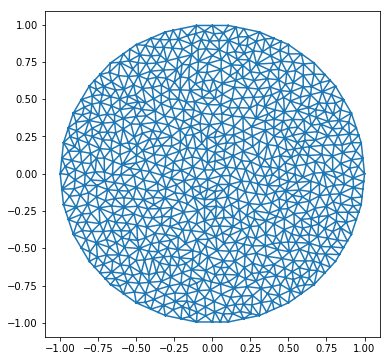

In [23]:
max_square = 3e-3
mesh(round_points(), max_square)

## Шаг 2. Составьте матрицу жесткости
* Напишите функцию, которая составляет $3\times 3$ матрицу $M$ для заданного треугольника
$$M = \frac{|T|}{2} G G^T,
\qquad\text{где}\qquad
G =
\left(
\begin{array}{ccc}
1 & 1 & 1 \\
x_1 & x_2 & x_3 \\
y_1 & y_2 & y_3
\end{array}
\right)^{-1}
\left(
\begin{array}{ccc}
0 & 0 \\
1 & 0 \\
0 & 1
\end{array}
\right),
$$
и |T| - площадь треугольника:
$$
2 |T| = \det \left(
\begin{array}{cc}
x _2 - x _1 & y _2 - y _1 \\
x _3 - x _1 & y _3 - y _1 \\
\end{array}
\right),
$$
(подробнее [лекция 4](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/lecture-4.ipynb)).
* В цикле по всем треугольникам соберите матрицу жеcткости.
<!---
```
for all T
    calculate M
    for k=1..3
        for l=1..3
            A[triangles[k], triangles[l]] += M[k, l]
```
-->

* Поправьте строки и столбцы, соответствующие условию Дирихле

**Примечание:** используйте $\verb|scipy.sparse|$ для работы с разреженными матрицами. Обратите внимание, что lil - это единственный формат $\verb|scipy.sparse|$ который позволяет менять элементы разреженной матрицы после создания.

In [24]:
def points_tris(points, triangle, iterator):
    return list(map(lambda i: points[i, iterator], triangle))

def calc_M(xs, ys):
    T = np.array([
        [1, 1, 1],
        xs[:],
        ys[:],
    ])
    E = np.array([
        [0, 0],
        [1, 0],
        [0, 1],
    ])
    G = np.linalg.inv(T) @ E
    return np.linalg.det(T) / 2 * G @ G.T

def stiffness_matrix(points, tris, facets):
    A = sps.lil_matrix((len(points), len(points)))
    for triangle in tris:
        M = calc_M(points_tris(points, triangle, 0),points_tris(points, triangle, 1))
        for i in enumerate(triangle):
            for j in enumerate(triangle):
                A[i[1], j[1]] += M[i[0], j[0]]
                
    for p in facets[:,0]:
        A[:, p] = A[p, :] = 0
        A[p, p] = 1
    
    return A

In [25]:
a,b,c = mesh(round_points(), max_square, draw=False)
A = stiffness_matrix(a,b,c)

## Шаг 3. Создайте правую часть уравнения

Правая часть уравнения для $i$-го узла сети: $$f_i = \int_\Omega f \eta_i d\Omega .$$
Чтобы собрать правую часть пройдите все узлы в цикле и посчитайте $$ \int_T f \eta_i.$$ Можно использовать апроксимацию $$ \int_T f \eta_i \approx f(x_S, y_S) \int_\Omega \eta_i, $$ где $(x_S,y_S)$ обозначает центр масс треугольника. Подробнее см. [лекцию 4](http://nbviewer.ipython.org/github/oseledets/fastpde/blob/master/lecture-4.ipynb). 

**Примечание:** не забудьте обнулить правую часть для узлов соответствующих условию Дирихле.

In [26]:
def area(x, y):
    m = np.array([[x[1] - x[0], y[1] - y[0]],[x[2] - x[0], y[2] - y[0]]])
    return np.linalg.det(m) / 2

def right_part(points, tris, facets):
    F = np.zeros(len(points))
    for triangle in tris:
        S = area(points_tris(points, triangle, 0),points_tris(points, triangle, 1))
        for t in triangle:
            F[t] += 1/3 * S * 1
    
    for p in facets:
        F[p] = 0
    
    return F

In [27]:
F = right_part(a,b,c)

## Шаг 4. Проверьте свой код
Проверьте, что свое решения, зная, что на области $\Omega = B_1(0,0)$ решение уравнения
$$
\begin{align*}
-\Delta u &= 1\qquad\text{on $\Omega$}
\\
u &= 0\qquad\text{on $\Gamma$}
\end{align*}
$$
имеет вид 
$$
u = \frac{1-x^2 - y^2}{4}
$$
**Примечание:** Проилюстрировать решение можно используя следующий код
```
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
xi = np.linspace(-1, 1, 200) 
yi = np.linspace(-1, 1, 200) 
z = mlab.griddata(points[:, 0], points[:, 1], sol, xi, yi)
plt.contourf(xi, yi, z)
plt.colorbar()
```

In [28]:
def plot_ans(points, sol):
    x = np.linspace(-1, 1, 200) 
    y = np.linspace(-1, 1, 200)
    xi = tuple(np.meshgrid(x, y))
    z = griddata((points[:, 0], points[:, 1]), sol, xi)
    plt.contourf(x, y, z)
    plt.colorbar()
    plt.show()

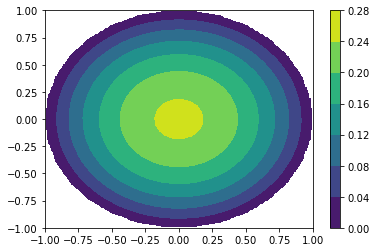

In [29]:
sol1 = spsolve(A, F)
plot_ans(a, sol1)

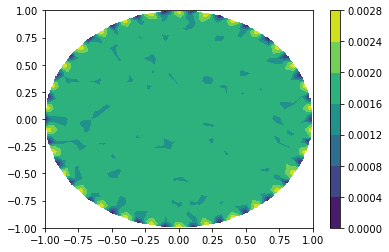

In [30]:
sol2 = (1 - a[:, 0]**2 - a[:, 1]**2)/4
plot_ans(a, abs(sol2 - sol1))

## Шаг 5. Решите задачу для заданного региона.
Рассмотрите регионы $\Omega_1 = B_1(0,0)\setminus B_{0.3}(0.7-2\epsilon,0)$ и $\Omega_2 = B_1(0,0)\setminus B_{0.3}(0.7-\epsilon,0)$ и покажите что полученные решения (или интегралы решений) близки друг к другу для малых $\epsilon$.

In [31]:
def round_points_inner(c,e):
    return [(0.3 * np.cos(angle) + (c - e), 0.3 * np.sin(angle)) for angle in np.linspace(0, 2 * np.pi, 30, endpoint=False)]

In [32]:
e = 1e-4

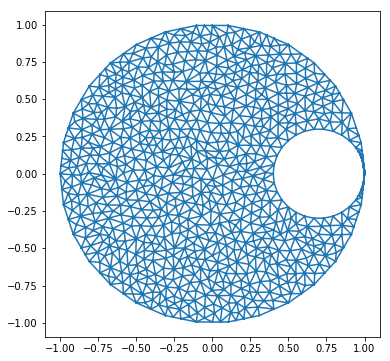

In [33]:
inner = round_points_inner(0.7,2 * e)
outer = round_points()

facets = round_trip_connect(0, len(inner))
facets.extend(round_trip_connect(len(facets), len(facets) + len(outer) - 1))

points = inner + outer

mesh(points, max_square, draw = True, holes=[(0.7 - 2 * e, 0)])

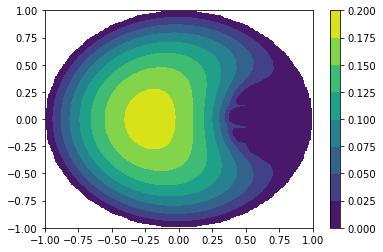

In [34]:
a,b,c = mesh(points, max_square, draw = False, holes=[(0.7 - 2 * e, 0)])
A = stiffness_matrix(a,b,c)
F = right_part(a,b,c)
sol = spsolve(A, F)
plot_ans(a, sol)

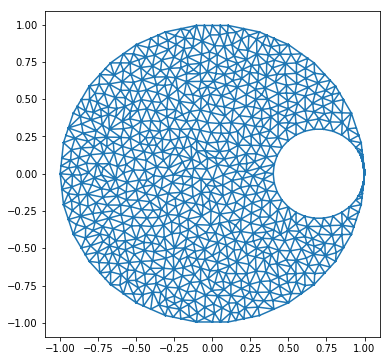

In [45]:
inner = round_points_inner(0.7,e)
outer = round_points()

facets = round_trip_connect(0, len(inner))
facets.extend(round_trip_connect(len(facets), len(facets) + len(outer) - 1))

points = inner + outer

mesh(points, max_square, draw = True, holes=[(0.7 - e, 0)])

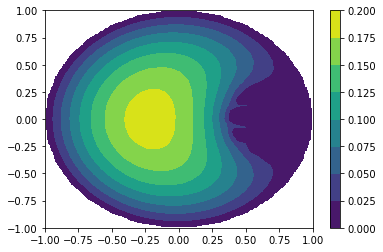

In [36]:
a,b,c = mesh(points, max_square, draw = False, holes=[(0.7 - e, 0)])
A = stiffness_matrix(a,b,c)
F = right_part(a,b,c)
sol1 = spsolve(A, F)
plot_ans(a, sol1)

## Шаг 6. Посчитайте поток жидкости
* Посчитайте поток жидкости для области $\int_{\Omega} u\, d \Omega$ in $B_1(0,0)\setminus B_{0.3}(0.7,0)$ и $B_1(0,0)\setminus B_{0.3}(0.5,0)$. Какой из них больше?

**Примечание:** $\int_{\Omega} u\, d \Omega$ не просто сумма всех элементов вектора решения, так как $u(x,y) \approx \sum с_i \eta_i(x,y)$.

In [18]:
def fluid_flow_calc(points,tris, sol):
    ans = 0
    for triangle in tris:
        S = area(points_tris(points, triangle, 0),points_tris(points, triangle, 1))
        for t in triangle:
            ans += 1/3 * S * sol[t]
    return ans

In [38]:
a,b,c = mesh(points, max_square, draw = False, holes=[(0.7, 0)])
A = stiffness_matrix(a,b,c)
F = right_part(a,b,c)
sol = spsolve(A, F)
print(fluid_flow_calc(a,b,sol))

0.24858245893607775


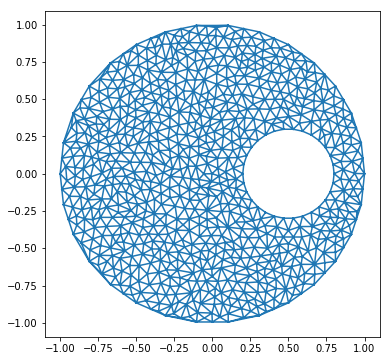

In [47]:
inner = round_points_inner(0.5 - e,0)
outer = round_points()

facets = round_trip_connect(0, len(inner) - 1)
facets.extend(round_trip_connect(len(facets), len(facets) + len(outer) - 1))

points = inner + outer

mesh(points, max_square, True,holes = [(0.5, 0)], facets=facets)

In [48]:
a,b,c = mesh(points, max_square, draw = False, holes=[(0.5, 0)])
A = stiffness_matrix(a,b,c)
F = right_part(a,b,c)
sol = spsolve(A, F)
print(fluid_flow_calc(a,b,sol))

0.1903300996876928


In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()